In [1]:
import sys
sys.path.append('../../src/')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from utils.utils import train_data, plot_results


%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
name = "Dropout"
activation = 'relu'
batch_size = 128
neurons_number = 64
epochs = 20
optimize = 'Adam'

In [3]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse', 'mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 64)                128       
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [4]:
X_train, Y_train = train_data(start=0, end=0.8, number=10000)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 1s 4ms/step - loss: 0.0533 - mse: 0.0533 - mean_absolute_error: 0.1708 - val_loss: 0.0022 - val_mse: 0.0022 - val_mean_absolute_error: 0.0457
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - mean_absolute_error: 0.0497 - val_loss: 0.0051 - val_mse: 0.0051 - val_mean_absolute_error: 0.0710
Epoch 3/20
63/63 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mean_absolute_error: 0.0425 - val_loss: 0.0091 - val_mse: 0.0091 - val_mean_absolute_error: 0.0947
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - mean_absolute_error: 0.0379 - val_loss: 0.0080 - val_mse: 0.0080 - val_mean_absolute_error: 0.0890
Epoch 5/20
63/63 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mean_absolute_error: 0.0352 - val_loss: 0.0102 - val_mse: 0.0102 - val_mean_absolute_error: 0.1003
Epoch 6/20
63/63 [============

In [5]:
X_test, Y_test = train_data(start=0, end=1.0, number=333)
loss, mse, mean_absolute_error = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 284us/step - loss: 0.0040 - mse: 0.0040 - mean_absolute_error: 0.0509  


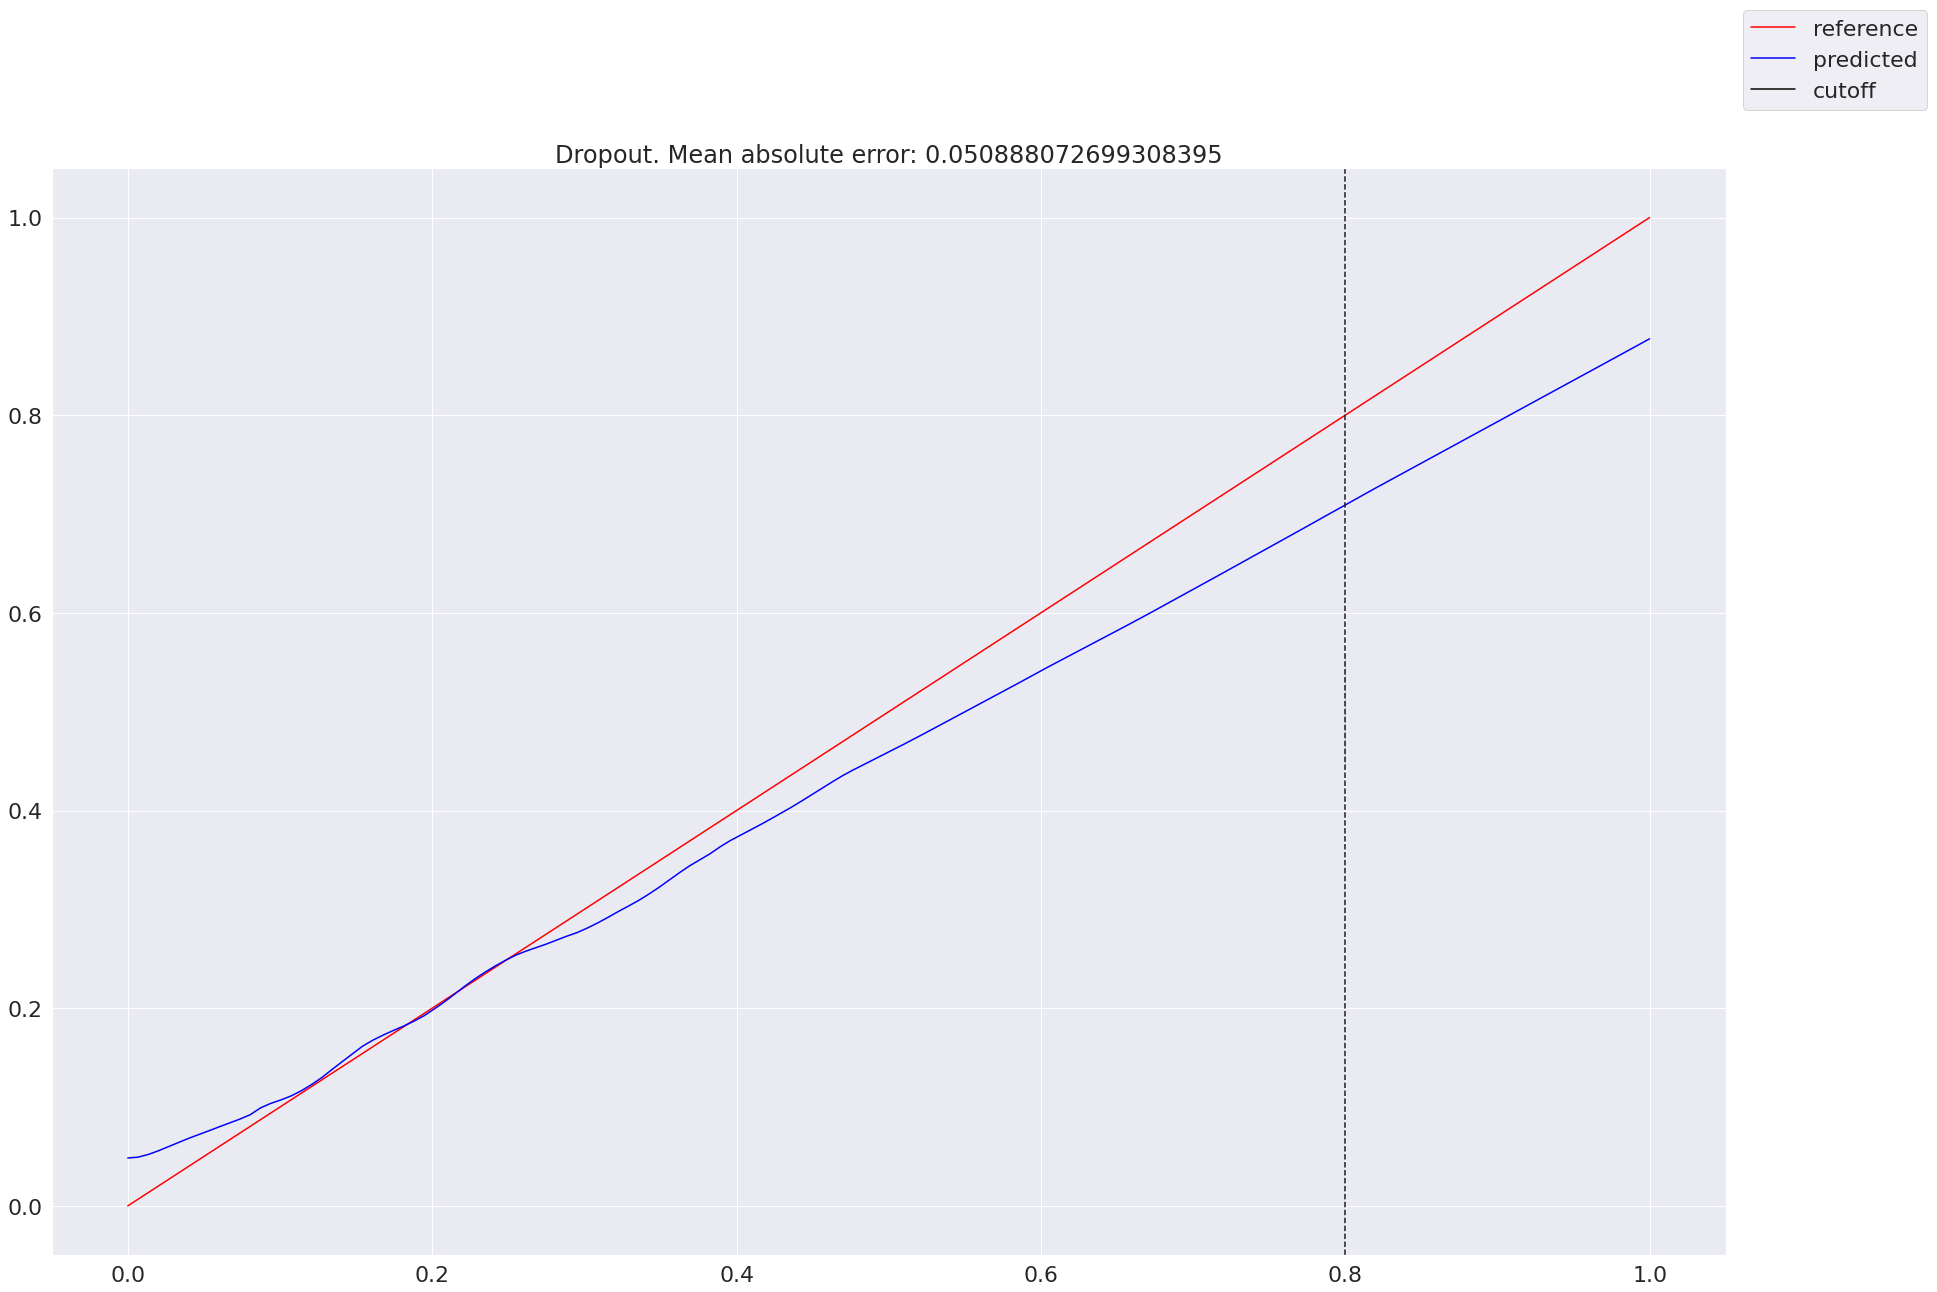

In [6]:
# %%
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

plot_results(grid, predicted, name, mean_absolute_error, 0.8)